# Amazon Sales Dataset 
in this project we use python analysis library to discover and analyis amazon sales data to improve sales,fillment and shipping process 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
df = pd.read_csv('Amazon Sale Report.csv')

C:\Users\iprahim\AppData\Local\Temp\ipykernel_6216\2257827399.py:4: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon Sale Report.csv')


## Discover Data

In [2]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [3]:
print(df.nunique())
print(df.isnull().sum())

index                 128975
Order ID              120378
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Style                   1377
SKU                     7195
Category                   9
Size                      11
ASIN                    7190
Courier Status             3
Qty                       10
currency                   1
Amount                  1410
ship-city               8955
ship-state                69
ship-postal-code        9459
ship-country               1
promotion-ids           5787
B2B                        2
fulfilled-by               1
Unnamed: 22                1
dtype: int64
index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size       

## Data Cleaning

In [4]:
# Duplicated rows
#print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("NUmber of duplicates rows: " , df.duplicated().sum())


NUmber of duplicates rows:  0


In [5]:
# Null values
lists = ['Courier Status','fulfilled-by','Unnamed: 22','currency']
#ASIN,SKU,Sales,Channel
df.drop(columns=lists, inplace=True)

In [6]:
# Fill null values with zero
df['Amount'].fillna(0.0, inplace=True)
#print(df['currency'].value_counts(dropna=False))
#print(df['Amount'].value_counts(dropna=False))

# Fill null values with unknowon
df['promotion-ids'].fillna('no-promotion', inplace=True)
df['ship-city'].fillna('unknown', inplace=True)
df['ship-state'].fillna('unknown', inplace=True)
df['ship-postal-code'].fillna(0, inplace=True)
df['ship-country'].fillna('unknown', inplace=True)


In [7]:
# Add month based on date
df['Date'] = pd.to_datetime(df['Date'])
df['month']=df['Date'].dt.month

df['month'].replace([3,4,5,6],['March','April','May','June'], inplace=True)
df = df[df['month'].isin(['April','May','June'])]

C:\Users\iprahim\AppData\Local\Temp\ipykernel_6216\305087288.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [8]:
# unique months
print(df['month'].unique())

['April' 'May' 'June']


In [9]:
# Now take a look
print(df.isnull().sum())

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Qty                   0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
month                 0
dtype: int64


## Data Visualization

In [10]:
# total sales
print("Total sales: ", df.Amount.sum())

Total sales:  78490994.45


Axes(0.125,0.11;0.775x0.77)


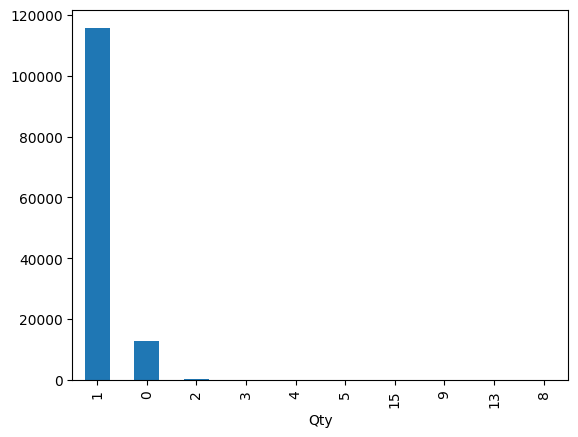

In [11]:
# number of product
print(df['Qty'].value_counts().plot(kind='bar'))
plt.show()
#major of customers order one product

Axes(0.125,0.11;0.775x0.77)


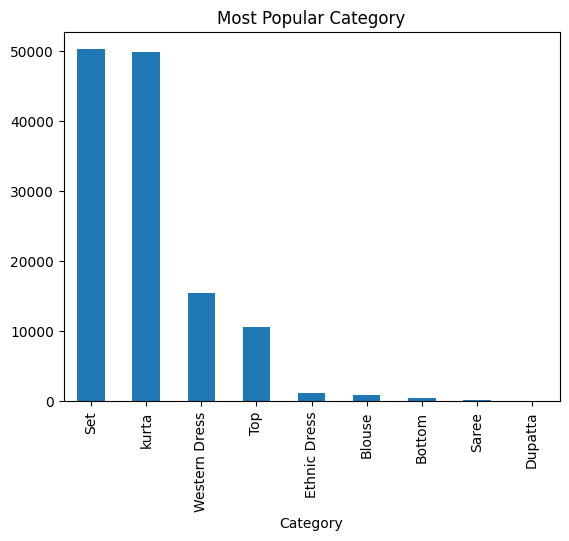

In [12]:
# most popular category

print(df.Category.value_counts().plot(kind='bar'))
plt.title('Most Popular Category')
plt.show()
# we see that (set) category then (kurta) and (Western Dress)

Text(0.5, 1.0, 'Monthly Sales')

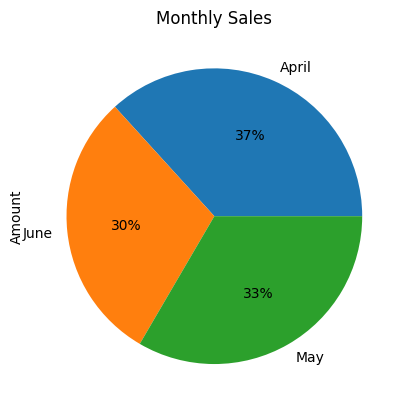

In [13]:
# sales according months
df.groupby('month')['Amount'].sum().plot(kind='pie',autopct='%1.0f%%')
plt.title('Monthly Sales')
# we see that (April) the best selling month then (May) and (June)

In [14]:
# make a copy of data frame and separate data into shipped and canceled
# shipped mean reached to customer
df1 = df.copy()
ship1 = df1[df1['Status'] == 'Shipped']
ship2 = df1[df1['Status'] == 'Shipped - Delivered to Buyer']
shipped = pd.concat([ship1, ship2], axis=0)

# note that canceled mean unreached, binding, canceled or return to seller (unreached to customer)
canceled = df1[(df1['Status'] != 'Shipped') & (df1['Status'] != 'Shipped - Delivered to Buyer')]

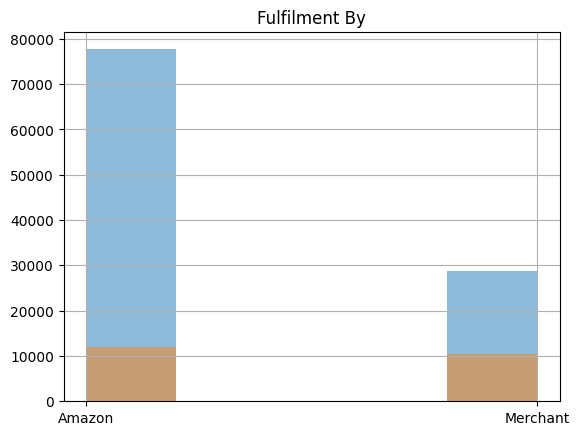

In [15]:
# now lets discover witch factor effect in product canceling ?

shipped['Fulfilment'].hist(alpha=0.5, bins=5, label='Shipped')
canceled['Fulfilment'].hist(alpha=0.5, bins=5, label='Canceled')
plt.title('Fulfilment By')
plt.show()

# from the result mejorty of shipped product is by (Amazon) and less percentage by the (merchant)
# but product by merchant are canceled more so,(merchant) have a problem in shipping.

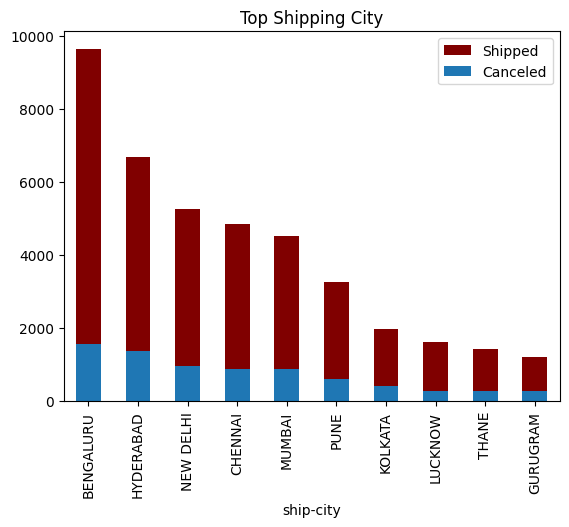

In [16]:
# which city order more and relation between city and canceling rate ?

shipped['ship-city'].value_counts()[:10].plot(kind='bar', color='maroon', label='Shipped')
canceled['ship-city'].value_counts()[:10].plot(kind='bar', label='Canceled')
plt.title('Top Shipping City')
plt.legend()
# we see that no relation between city and canceling rate

C:\Users\iprahim\AppData\Local\Temp\ipykernel_6216\737090797.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(group_month.index, fontsize=12)
C:\Users\iprahim\AppData\Local\Temp\ipykernel_6216\737090797.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(list(range(0,41,5)),fontsize=14)


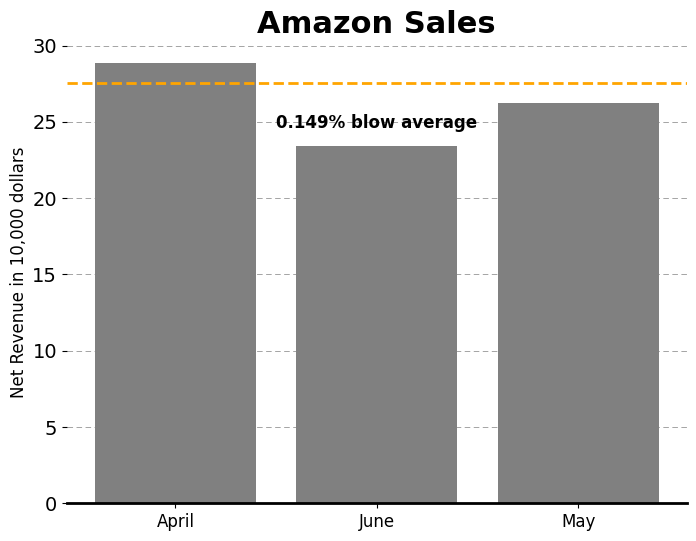

In [17]:
# Compute percentage below average revenue for quarter

# Get latest month revenue and average quarterly revenue
group_month = df.groupby('month')['Amount'].sum()
fig,ax = plt.subplots(figsize=(8,6))
bars = ax.bar(group_month.index,group_month.values,color='gray')

quarter_avg = (group_month.values[0] + group_month.values[2]) / 2
for i, bar in (enumerate(bars)):
    if i == len(bars)-1 or i < len(bars)-2:
        continue
    pct_below_avg = round(1 - (group_month.values[i] / quarter_avg), 3)
    ax.annotate(f'{pct_below_avg}% blow average',
                xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                xytext=(0, 10), textcoords='offset points',  fontweight='bold',
                ha='center', va='bottom', fontsize=12)

ax.axhline(quarter_avg, linestyle='--', color='orange', linewidth=2, label='Q2 Average Revenue')
ax.set_title('Amazon Sales', fontsize=22, fontweight='bold')

ax.set_xlabel(None)
ax.set_xticklabels(group_month.index, fontsize=12)
ax.set_yticklabels(list(range(0,41,5)),fontsize=14)

ax.set_ylabel('Net Revenue in 10,000 dollars', fontsize=12, labelpad=3)
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
plt.show()


## Analysis Facts

#### From the analysis result we have important fact:-
1. Total sales: 78490994.45
2. major of customers order one product
3. we see that top selling category is (set) category then (kurta) and (Western Dress)
4. we see that (April) the best selling month then (May) and (June)
5. sales is decress form april to june by 0.149%
6. mejorty of shipped product is by (Amazon) and less percentage by the (merchant) but product by merchant are canceled more so,(merchant) have a   problem in shipping
7. canceling rate have no relation with city so keep announce as it is distreputed among cities 
8. we see that (set) category then (kurta) and (Western Dress) so try to invest is this three porject more than the other
9. mejorty of shipped product is by (Amazon) and less percentage by the (merchant)
